In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,r2_score
from sklearn.model_selection import cross_val_score

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Online Shoppers intention csv file is read and loaded to osi
osi = pd.read_csv("osi.csv")

In [3]:
#Shape is printed with (rows,columns)
print("Osi data shape:", osi.shape)

Osi data shape: (12330, 18)


In [4]:
type(osi)

pandas.core.frame.DataFrame

In [5]:
#osi table is displayed
osi

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [6]:
#Null or NA values are dropped
osi.dropna(inplace=True)

In [7]:
#Checking if null values are present
print (osi.isna().sum())
print (osi.isna().sum().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64
0


# Data Exploration

In [8]:
#Generates basic Descriptive Statistics
osi.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157213,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [9]:
osi.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [10]:
#The categorical columns are converted to object data type
osi['Administrative'] = osi['Administrative'].astype('float64')
osi['Informational'] = osi['Informational'].astype('float64')
osi['ProductRelated'] = osi['ProductRelated'].astype('float64')
osi['SpecialDay'] = osi['SpecialDay'].astype('object')
osi['OperatingSystems'] = osi['OperatingSystems'].astype('object')
osi['Browser'] = osi['Browser'].astype('object')
osi['Region'] = osi['Region'].astype('object')
osi['TrafficType'] = osi['TrafficType'].astype('object')

In [11]:
osi.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                  object
Month                       object
OperatingSystems            object
Browser                     object
Region                      object
TrafficType                 object
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [12]:
#Count of unique values in categorical columns is viewed
osi['SpecialDay'].value_counts()

0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64

In [13]:
osi['OperatingSystems'].value_counts()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

In [14]:
osi['Browser'].value_counts()

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

In [15]:
osi['Region'].value_counts()

1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

In [16]:
osi['TrafficType'].value_counts()

2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

In [17]:
osi['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [18]:
osi['Weekend'].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

In [19]:
osi['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

#  Univariate Analysis

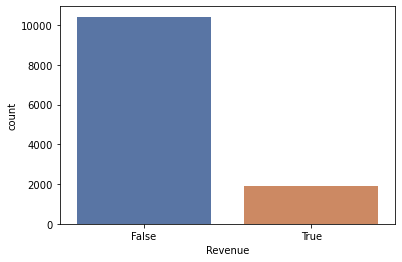

In [20]:
#Using countplot we can see the count of each value in bar graph
sns.countplot(osi.Revenue, palette = 'deep')
plt.show()

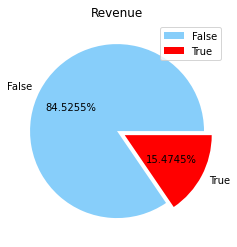

In [21]:
#Pie chart shows the percentage of the each value in the Revenue
Revlabel = ['False', 'True']
colors = ['lightskyblue', 'red']
explode =(0,0.1)
plt.title("Revenue")
plt.pie(osi.Revenue.value_counts(), labels = Revlabel, autopct = '%.4f%%', colors = colors, explode = explode)
plt.legend()
plt.show()

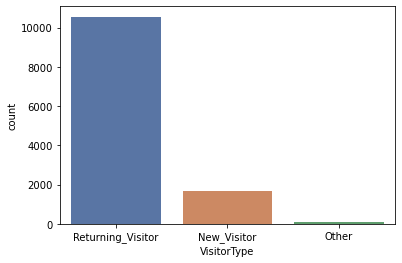

In [22]:
sns.countplot(osi.VisitorType, palette = 'deep')
plt.show()

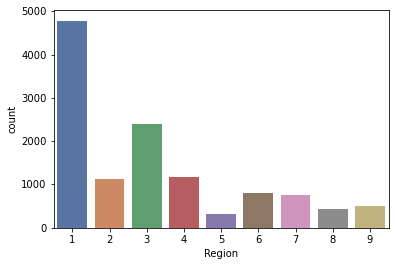

In [23]:
sns.countplot(osi.Region, palette = 'deep')
plt.show()

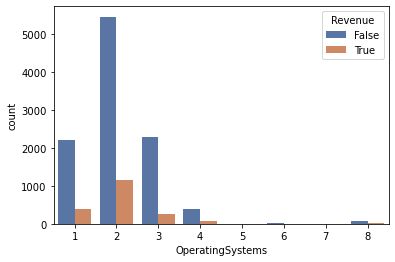

In [24]:
#In this countplot based on legend 'Revenue', values are displayed
sns.countplot(osi.OperatingSystems, hue = osi.Revenue, palette = 'deep')
plt.show()

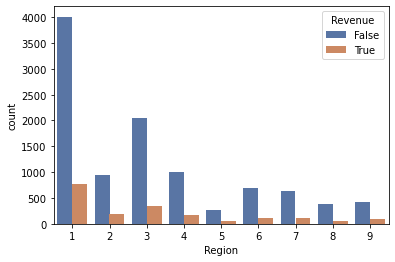

In [25]:
sns.countplot(osi.Region, hue = osi.Revenue, palette = 'deep')
plt.show()

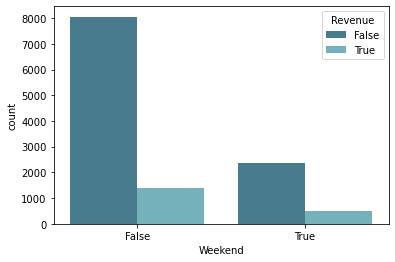

In [26]:
sns.countplot(osi.Weekend, hue = osi.Revenue, palette = 'GnBu_d')
plt.show()

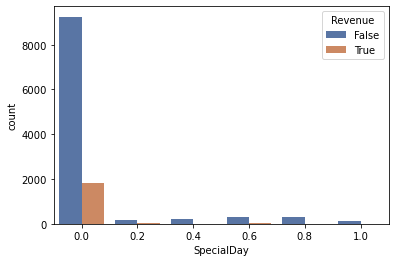

In [27]:
sns.countplot(osi.SpecialDay, hue = osi.Revenue, palette = 'deep')
plt.show()

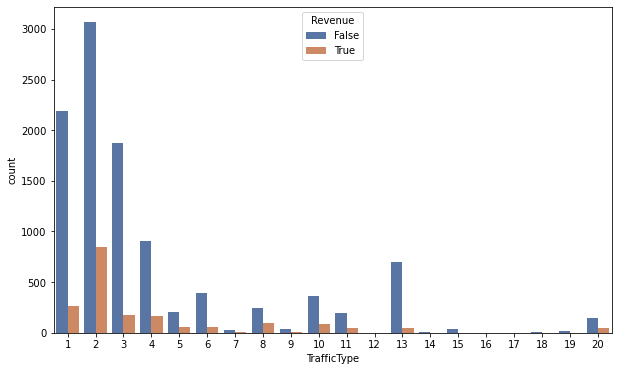

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(osi.TrafficType, hue = osi.Revenue, palette = 'deep')
plt.show()

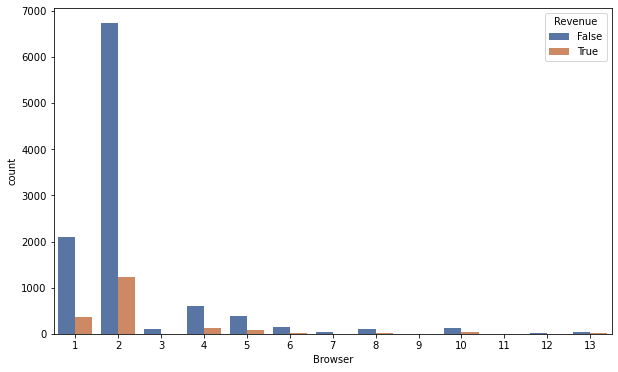

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(osi.Browser, hue = osi.Revenue, palette = 'deep')
plt.show()

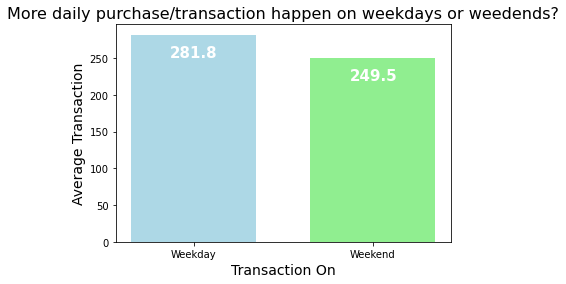

In [30]:
# Average Daily transaction on Weekdays VS. on Weekends

weekend_revenue_avg = osi.query('Weekend == True & Revenue == True')['Revenue'].count()/2
weekday_revenue_avg = osi.query('Weekend == False & Revenue == True')['Revenue'].count()/5

b=[weekday_revenue_avg, weekend_revenue_avg]
a=[j for j in range(len(b))]

bars = plt.bar(a, height=b, width=.7, color=['lightblue', 'lightgreen'])

xlocs, xlabs = plt.xticks()

xlocs=[j for j in a]
xlabs=[j for j in b]

plt.title('More daily purchase/transaction happen on weekdays or weedends?', color='black', fontsize=16)
plt.xlabel('Transaction On', color='black', fontsize=14)
plt.ylabel('Average Transaction', color='black', fontsize=14)
plt.xticks(xlocs, ('Weekday', 'Weekend'))

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.22, yval-30, yval, fontsize=15, color='white', fontweight='bold')
    
plt.show()

# Data Preparation for Modelling

In [31]:
#Bool values of Weekend and Revenue are converted to '0 and 1'
osi2 = osi
osi2.Weekend = osi2.Weekend.replace({True: 1, False: 0})
osi2.Revenue = osi2.Revenue.replace({True: 1, False: 0})

In [32]:
osi2.Weekend.unique()

array([0, 1], dtype=int64)

In [33]:
osi2.Revenue.unique()

array([0, 1], dtype=int64)

In [34]:
#Taking the dummy values into columns for Visitor type and dropping the Visitor Type column
dummy1 = pd.get_dummies(osi2['VisitorType'],drop_first=True) 
osi2 = pd.concat([osi2.drop('VisitorType', axis=1), dummy1],axis=1) 
osi2 = osi2.drop('Other',axis=1)

In [35]:
osi2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Returning_Visitor
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0,Feb,1,1,1,1,0,0,1
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0,Feb,2,2,1,2,0,0,1
2,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0,Feb,4,1,9,3,0,0,1
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0,Feb,3,2,2,4,0,0,1
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0,Feb,3,3,1,4,1,0,1


In [36]:
osi2.Returning_Visitor.unique()

array([1, 0], dtype=uint8)

In [37]:
#Chaning the month names to their number
osi2.Month.unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [38]:
osi2['Month'] = osi2['Month'].map({'Feb':2,'Mar':3,'May':5,'Oct':10,'June':6,'Jul':7,'Aug':8,'Nov':11,'Sep':9,'Dec':12})

In [39]:
osi2.Month.unique()

array([ 2,  3,  5, 10,  6,  7,  8, 11,  9, 12], dtype=int64)

In [40]:
#Basic Descriptive Statistics after prepping the data
osi2.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Month,Weekend,Revenue,Returning_Visitor
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,7.651987,0.232603,0.154745,0.855718
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,3.392841,0.422509,0.361676,0.351390
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,5.000000,0.000000,0.000000,1.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,7.000000,0.000000,0.000000,1.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,11.000000,0.000000,0.000000,1.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,12.000000,1.000000,1.000000,1.000000


In [41]:
#Taking target column and others separately 
x2 = osi2
x2 = x2.drop(['Revenue'], axis = 1)
y2 = osi2['Revenue']

# Feature Importance

[0.05274399 0.04704088 0.02882029 0.02820007 0.06604475 0.066041
 0.05378964 0.07855524 0.3458534  0.00588359 0.05150628 0.03126312
 0.03122091 0.04321452 0.04261079 0.01502926 0.01218227]


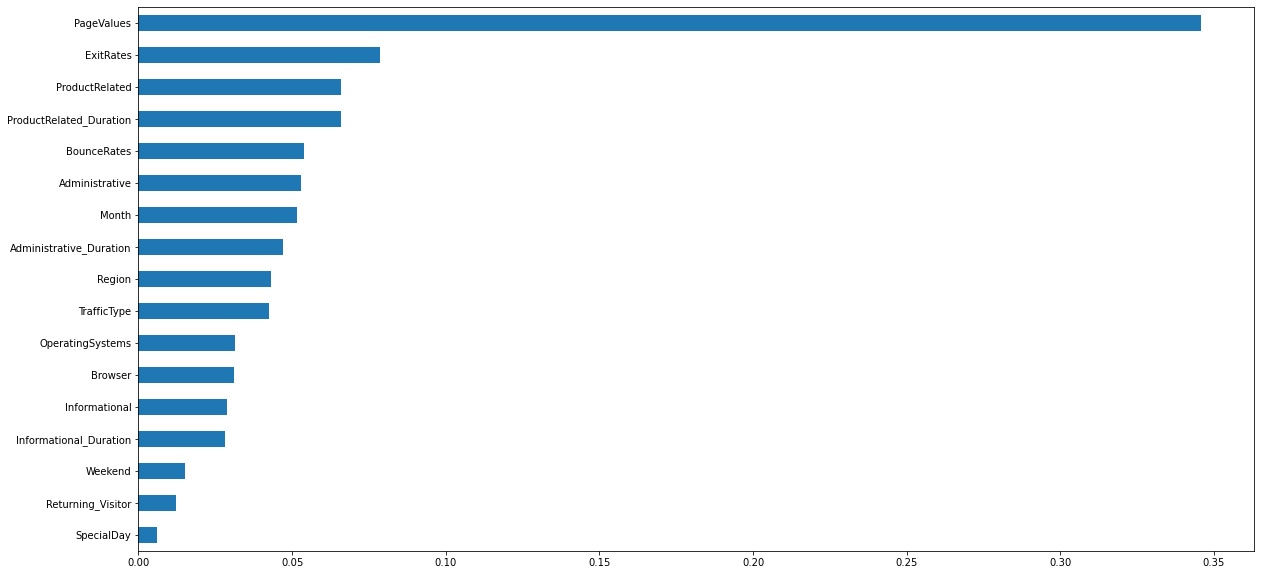

In [42]:
#Using Extra Tree Classifier to find the important attributes or features contributing to the Revenue
model = ExtraTreesClassifier()
model.fit(x2,y2)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x2.columns)
feat_importances.nlargest(20).sort_values(ascending=True).plot(kind='barh',figsize=(20, 10))
plt.show()

## Correlation Matrix

In [43]:
#Using correlation matrix, for finding the relationship between the attributes
corr = osi2.corr()
corr.style.background_gradient(cmap='viridis').set_precision(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Month,Weekend,Revenue,Returning_Visitor
Administrative,1.00,0.60,0.38,0.26,0.43,0.37,-0.22,-0.32,0.10,0.10,0.03,0.14,-0.02
Administrative_Duration,0.60,1.00,0.30,0.24,0.29,0.36,-0.14,-0.21,0.07,0.06,0.01,0.09,-0.02
Informational,0.38,0.30,1.00,0.62,0.37,0.39,-0.12,-0.16,0.05,0.06,0.04,0.10,0.06
Informational_Duration,0.26,0.24,0.62,1.00,0.28,0.35,-0.07,-0.11,0.03,0.04,0.02,0.07,0.05
ProductRelated,0.43,0.29,0.37,0.28,1.00,0.86,-0.20,-0.29,0.06,0.16,0.02,0.16,0.13
ProductRelated_Duration,0.37,0.36,0.39,0.35,0.86,1.00,-0.18,-0.25,0.05,0.14,0.01,0.15,0.12
BounceRates,-0.22,-0.14,-0.12,-0.07,-0.20,-0.18,1.00,0.91,-0.12,-0.07,-0.05,-0.15,0.13
ExitRates,-0.32,-0.21,-0.16,-0.11,-0.29,-0.25,0.91,1.00,-0.17,-0.10,-0.06,-0.21,0.17
PageValues,0.10,0.07,0.05,0.03,0.06,0.05,-0.12,-0.17,1.00,0.07,0.01,0.49,-0.12
Month,0.10,0.06,0.06,0.04,0.16,0.14,-0.07,-0.10,0.07,1.00,0.02,0.13,-0.11


In [44]:
#Using SelectKBest Class to find top 10 features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x2,y2)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x2.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specifications','Score']  
print(featureScores.nlargest(10,'Score')) 
print("")
print("Top 10 Best Features using SelectKBest class")

             Specifications          Score
5   ProductRelated_Duration  877404.339415
8                PageValues  175126.808512
1   Administrative_Duration   41754.836841
3    Informational_Duration   35059.775770
4            ProductRelated   19317.285376
0            Administrative    1133.965531
2             Informational     357.981605
10                    Month     300.903189
9                SpecialDay      53.797094
6               BounceRates      29.654336

Top 10 Best Features using SelectKBest class


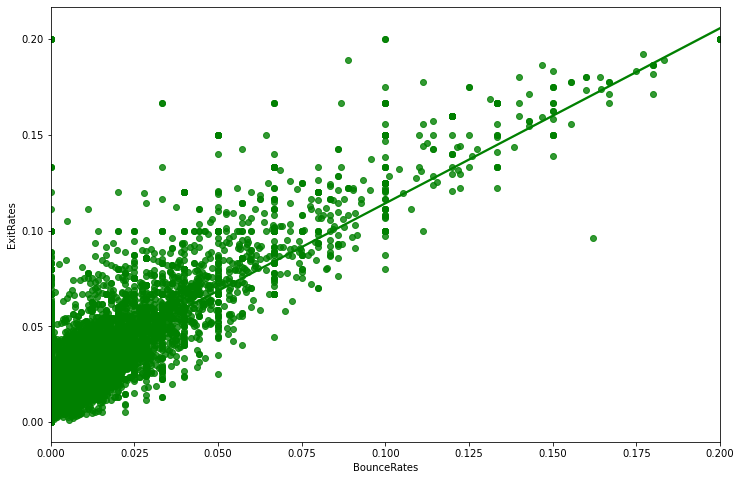

In [45]:
#Plotting linear regression for Bounce Rates and Exit Rates
plt.figure(figsize=(12, 8))
sns.regplot(x=osi2["BounceRates"], y=osi2["ExitRates"], color="g")
plt.show()

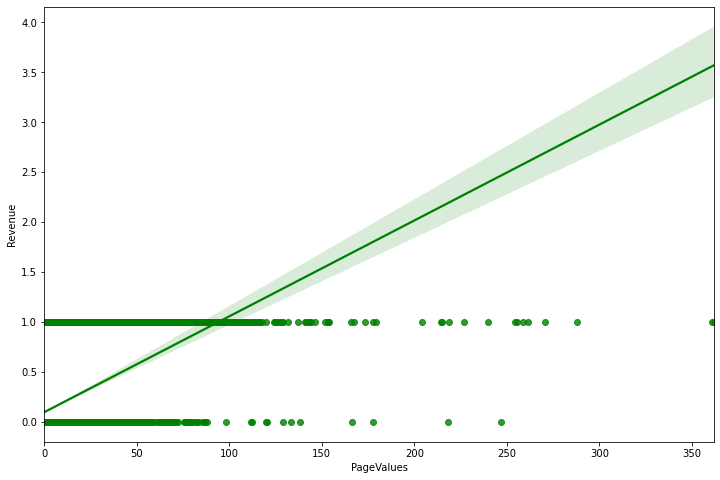

In [46]:
#Plotting linear regression for Page Values and Revenue
plt.figure(figsize=(12, 8))
sns.regplot(x=osi2["PageValues"], y=osi2["Revenue"], color="g")
plt.show()

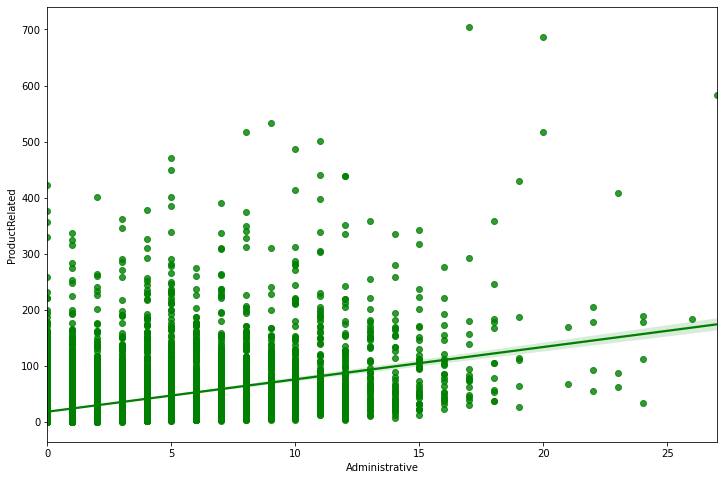

In [47]:
plt.figure(figsize=(12, 8))
sns.regplot(x=osi2["Administrative"], y=osi2["ProductRelated"], color="g")
plt.show()

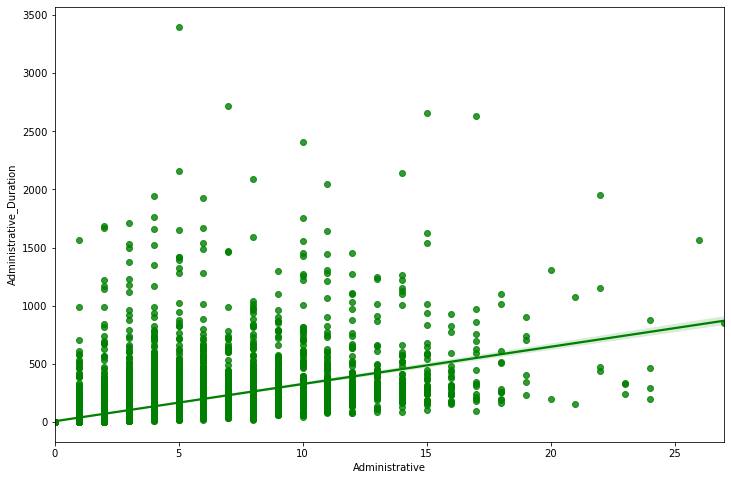

In [48]:
plt.figure(figsize=(12, 8))
sns.regplot(x=osi2["Administrative"], y=osi2["Administrative_Duration"], color="g")
plt.show()

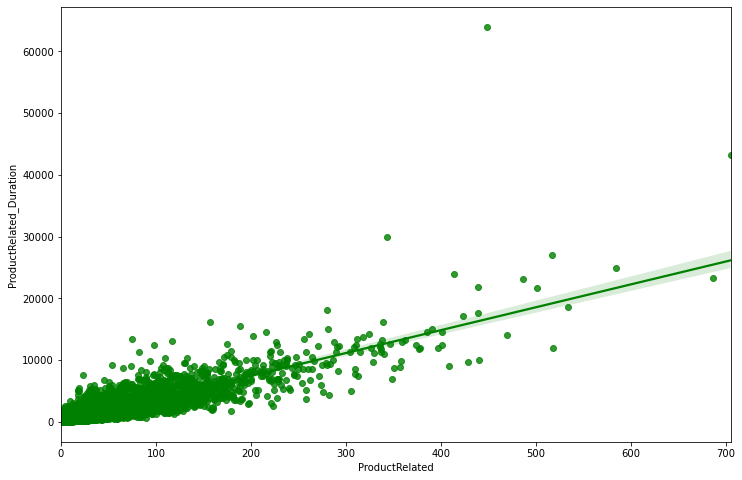

In [49]:
plt.figure(figsize=(12, 8))
sns.regplot(x=osi2["ProductRelated"], y=osi2["ProductRelated_Duration"], color="g")
plt.show()

In [50]:
#Checking the shape of x2 and y2 before Modelling
print("Shape of x2:", x2.shape)
print("Shape of y2:", y2.shape)

Shape of x2: (12330, 17)
Shape of y2: (12330,)


In [51]:
y2.dtypes

dtype('int64')

# Data Modelling

# Suite - 1 50% for Training and 50% for Testing

In [52]:
#x and y are split into test and train based on test size
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.5, random_state = 0)


print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (6165, 17)
Shape of y_train : (6165,)
Shape of x_test : (6165, 17)
Shape of y_test : (6165,)


In [53]:
#Random Forest Classification model is chosen to train and test the model
chosenmodel = RandomForestClassifier(max_depth=5, random_state =101)
chosenmodel.fit(x_train, y_train)

y_predict = chosenmodel.predict(x_test)

print("Training Accuracy :", chosenmodel.score(x_train, y_train))
print("Testing Accuracy :", chosenmodel.score(x_test, y_test))
print("Accuracy :", accuracy_score(y_test, y_predict))

Training Accuracy : 0.9083536090835361
Testing Accuracy : 0.8944038929440389
Accuracy : 0.8944038929440389


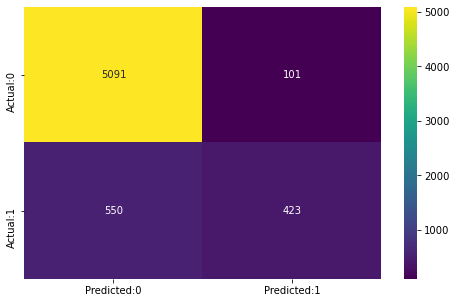

In [54]:
#Plotting the confusion matrix
cm = confusion_matrix(y_test,y_predict)
confusionmatrix = pd.DataFrame(data=cm, columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(confusionmatrix, annot=True, fmt='d', cmap="viridis")
plt.show()

In [55]:
#Printing the Classification Report
classreport = classification_report(y_test, y_predict)
print(classreport)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      5192
           1       0.81      0.43      0.57       973

    accuracy                           0.89      6165
   macro avg       0.85      0.71      0.75      6165
weighted avg       0.89      0.89      0.88      6165



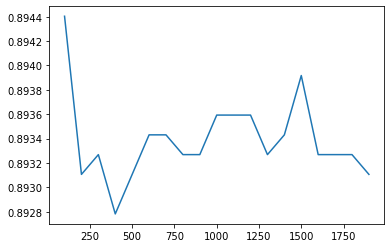

In [56]:
#Plotting the scores on the graph
scores=[]
for i in (np.arange(100,2000,100)):
  classifier = RandomForestClassifier(n_estimators =i, max_depth=5, random_state =101) 
  classifier.fit(x_train, y_train) 
  scores.append(classifier.score(x_test,y_test)) 
plt.plot(np.arange(100,2000,100),scores) 
plt.show()

In [57]:
#Decision Tree Classification model is chosen to train and test the model
chosenmodel = DecisionTreeClassifier(max_depth =5, random_state =101)
chosenmodel.fit(x_train, y_train)

y_predict = chosenmodel.predict(x_test)

print("Training Accuracy :", chosenmodel.score(x_train, y_train))
print("Testing Accuracy :", chosenmodel.score(x_test, y_test))
print("Accuracy :", accuracy_score(y_test, y_predict))

Training Accuracy : 0.9094890510948905
Testing Accuracy : 0.8976480129764801
Accuracy : 0.8976480129764801


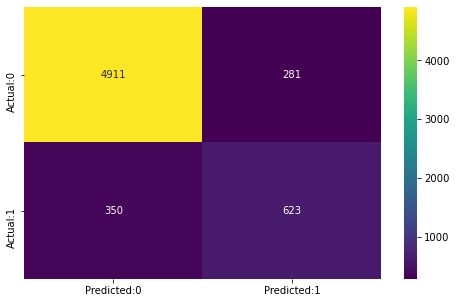

In [58]:
#Plotting the confusion matrix
cm = confusion_matrix(y_test,y_predict)
confusionmatrix = pd.DataFrame(data=cm, columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(confusionmatrix, annot=True, fmt='d', cmap="viridis")
plt.show()

In [59]:
#Printing the Classification Report
classreport = classification_report(y_test, y_predict)
print(classreport)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      5192
           1       0.69      0.64      0.66       973

    accuracy                           0.90      6165
   macro avg       0.81      0.79      0.80      6165
weighted avg       0.89      0.90      0.90      6165

